In [1]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import csv
import glob
import numpy as np

In [3]:
header=["label"]
for i in range(0, 784):
    header.append("pixel"+str(i))
    
with open('dataset1.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

In [4]:
for label in range(10):
    dirList=glob.glob("images/"+str(label)+"/*.png")

    for img_path in dirList:
        im=cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi= cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

        data=[]
        data.append(label)
        rows, cols = roi.shape

        ## Add pixel one by one into data Array.
        for i in range(rows):
            for j in range(cols):
                k = roi[i, j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset1.csv','a') as f:
            writer = csv.writer(f)
            writer.writerow(data)



# Load the dataset

In [5]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install matplotlib
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Sepration of dependent and independent variables

In [10]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('dataset.csv')

# Remove rows where all elements are NaN (or empty)
df_cleaned = df.dropna(how='all')

# Save the cleaned data back to a CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)


In [2]:
data=[]
label=[]

with open('cleaned_data.csv') as f:
    reader=csv.reader(f)
    next(reader)
    for row in reader:
        label.append(int(row[0]))
        data.append([int(x) for x in row[1:]])


data = np.array(data) 
label = np.array(label)

print(data.shape)  
print(label.shape)  

print(data[0].shape)







(1000, 784)
(1000,)
(784,)


In [37]:
# import matplotlib.pyplot as plt
# import cv2
# idx=23
# img=X.loc[idx].values.reshape(28,28)
# if img.size==784:
#     img=img.reshape(28,28)
# plt.imshow(img.astype(float))

import cv2

idx=np.random.randint(0, len(data))
img=data[idx]
img=img.reshape(28,28).astype(np.uint8)

# resized_img = cv2.resize(img, (400, 400)) 

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


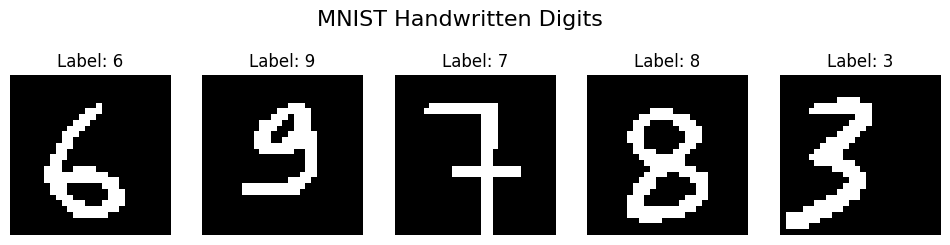

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' contains your MNIST image data and 'label' contains corresponding labels

# Function to visualize MNIST images
def visualize_mnist_images(data, label, num_images=5):
    # Select random indices from the dataset
    indices = np.random.choice(len(data), num_images, replace=False)
    
    # Plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    fig.suptitle('MNIST Handwritten Digits', fontsize=16)
    
    for i, idx in enumerate(indices):
        img = data[idx].reshape(28, 28)  # Reshape to 28x28 image
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Label: {label[idx]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming 'data' and 'label' are loaded correctly as numpy arrays
visualize_mnist_images(data, label, num_images=5)


# Train test split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model building

In [11]:
import joblib
from sklearn.svm import SVC

# Assuming X_train and y_train are defined earlier in your code.
# If not, you need to define or load them before using.

classifier = SVC(kernel="linear", random_state=42)
classifier.fit(X_train, y_train)
joblib.dump(classifier, "model/digit_recognizer.pkl")  # Added file extension for clarity


ValueError: could not convert string to float: 'pixel0'

In [ ]:
from sklearn import metrics
prediction = classifier.predict(X_test)
print("Accuracy = ", metrics.accuracy_score(y_test, prediction))


AttributeError: 'SVC' object has no attribute 'support_vectors_'

In [ ]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model = joblib.load("model/digit_recognizer")
image_path = "img/"

while True:
    img=ImageGrab.grab(bbox=(60, 170, 400, 500)) #bbox specifies specific region (bbox= x,y,width,height)
    img.save(image_path+"img.png")
    im = cv2.imread(image_path+"img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []
    ## Add pixel one by one into data Array.
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
    
    predictions = model.predict([X])
    print("Prediction:", predictions[0])

    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20, 20), 0, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==27:
        break





c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


c:\Users\mkkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


KeyboardInterrupt: 